**Objetivos desta aula prática:**

1. Dividir dados em treino e teste com estratificação.
2. Avaliar modelos de classificação usando:
 - Matriz de Confusão
 - Acurácia, Precisão, Revocação (Recall), F1-Score
 - Curva ROC e AUC

3. Avaliar modelos de regressão usando:
 * MSE, RMSE, MAE e R²

- **VP (Verdadeiros Positivos)**: Alunos que **realmente reprovaram** e foram **corretamente previstos como reprovados**.

- **VN (Verdadeiros Negativos)**: Alunos que **realmente passaram** e foram **corretamente previstos como aprovados** pelo modelo.

- **FP (Falsos Positivos)**: Alunos que o modelo "achou" que reprovariam mas passaram  

- **FN (Falsos Negativos)**: Alunos que o modelo "achou" que passariam mas reprovaram



[🟩 VP: 93] | [🟥 FP: 7]
------------|------------
[🟨 FN: 8]  | [🟦 VN: 92]



Legenda:

🟩 Verdadeiro Positivo

🟦 Verdadeiro Negativo

🟥 Falso Positivo (Erro I)

🟨 Falso Negativo (Erro II)

**Exercício:** Faça o cálculo manualmente das métricas a partir dos valores da matriz de confusão e preencha a tabela a seguir:

| Métrica         | Fórmula               | Cálculo               | Resultado | Interpretação                                                                 |
|-----------------|-----------------------|-----------------------|-----------|-------------------------------------------------------------------------------|
| **Acurácia**    | (VP + VN) / Total     | (93 + 92) / 200       | 92.5%     | 92.5% das previsões estão corretas                                             |
| **Precisão**    | VP / (VP + FP)        |          |      | Dos previstos como aprovados, X% realmente passaram                          |
| **Recall**      | VP / (VP + FN)        |          |      | Dos alunos que passaram,X% foram identificados                              |
| **F1-Score**    | 2*(Prec*Rec)/(Prec+Rec)|  |     | Média harmônica entre Precisão e Recall                                      |
| **Especificidade** | VN / (VN + FP)     |          |     | Dos alunos que reprovaram, X% foram identificados corretamente               |
| **Taxa de Erro**| (FP + FN) / Total     |        |      | X% das previsões estão incorretas                                           |


# Métricas de Regressão

## 🔍 **Escolha Baseada no Seu Objetivo**

| Métrica | Melhor Para...                    | Exemplo Prático                     | Cuidado!                          |
|---------|-----------------------------------|-------------------------------------|-----------------------------------|
| **RMSE** | Quando **erros grandes são graves** (e devem ser penalizados mais) | Prever doses de medicamentos (erros altos são perigosos) | Sensível a outliers               |
| **MAE**  | Quando **todos os erros têm igual importância** | Prever preços de produtos cotidianos | Não destaca erros graves          |
| **R²**   | Saber **% da variância explicada** pelo modelo | Comparar dois modelos de previsão de notas | Pode ser alto mesmo com erros grandes |
| **MSE**  | Otimização de modelos (foco nos **erros quadráticos**) | Uso interno em algoritmos de ML | Difícil interpretação direta      |

## 📌 **Regra Prática: Qual Métrica Escolher?**

1. **"Preciso entender o erro em unidades reais?"** → RMSE ou MAE  
   - RMSE se erros grandes forem críticos  
   - MAE se todos os erros forem igualmente importantes  

2. **"Quero comparar modelos diferentes?"** → R² (quanto maior, melhor)  

3. **"Meu modelo será usado para tomar decisões de alto risco?"** → RMSE (prioriza evitar erros graves)  

4. **"Meus dados têm muitos valores extremos?"** → MAE (é mais robusto)  

## 💡 **Exemplo com Notas de Alunos**
- Se você está prevendo **notas finais** para identificar alunos em risco:  
  - Use **RMSE** (errar em 5 pontos é pior que errar em 1)  
- Se está prevendo **aprovados/reprovados**:  
  - Use **R²** para ver se o modelo explica bem a variação nas notas  

## ⚠️ **Armadilhas Comuns**
- **Só usar R²**: Pode mascarar erros grandes se o modelo estiver enviesado  
- **Ignorar outliers**: RMSE vai inflacionar, MAE é mais justo  
- **Não contextualizar**: Um RMSE de 2 é bom? Depende! Se as notas vão de 0 a 10, é ótimo. Se vão de 0 a 100, é péssimo.  

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
dados = pd.read_csv('datasets/dados_aprovacao_alunos.csv')
x = dados[['nota', 'faltas']]
y = dados['aprovado']

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(x_train, y_train)

LogisticRegression()

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

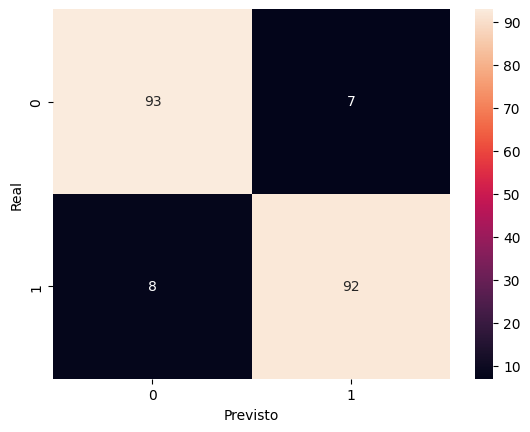

In [6]:
y_pred = modelo.predict(x_test)
mc = confusion_matrix(y_test, y_pred)
sns.heatmap(mc, annot=True, fmt='d')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

In [7]:
verdadeiros_positivos = mc[0, 0]
verdadeiros_negativos = mc[1, 1]
falsos_positivos = mc[0, 1]
falsos_negativos = mc[1, 0]
precision = verdadeiros_positivos / (verdadeiros_positivos + falsos_positivos)
recall = verdadeiros_positivos / (verdadeiros_positivos + falsos_negativos)
f1_score = 2 * (precision * recall) / (precision + recall)
especificidade = verdadeiros_negativos / (verdadeiros_negativos + falsos_positivos)
taxa_erro = (falsos_positivos + falsos_negativos) / (verdadeiros_positivos + verdadeiros_negativos + falsos_positivos + falsos_negativos)

In [8]:
print(precision*100,'%')
print(recall*100,'%')
print(f1_score*100,'%')
print(especificidade*100,'%')
print(taxa_erro*100,'%')

93.0 %
92.07920792079209 %
92.53731343283582 %
92.92929292929293 %
7.5 %


In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       100
           1       0.93      0.92      0.92       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200



In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = modelo.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

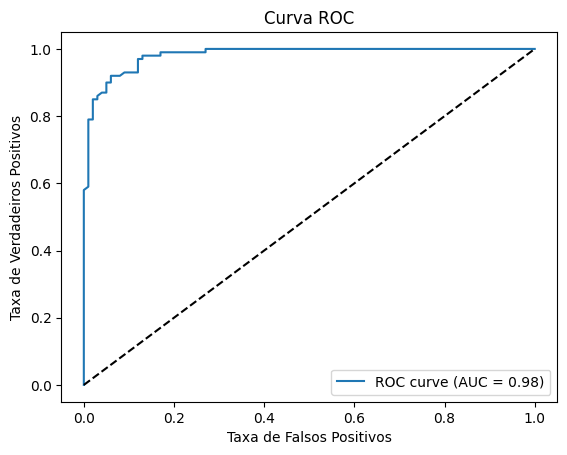

In [11]:
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [16]:
dados_reg = pd.read_csv('datasets/dados_previsao_nota.csv')
x_reg = dados_reg['horas_estudo'].values.reshape(-1, 1)
y_reg = dados_reg['nota_final']

In [17]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

modelo_reg = LinearRegression()
modelo_reg.fit(x_train_reg, y_train_reg)

LinearRegression()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred_reg = modelo_reg.predict(x_test_reg)

mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

In [20]:
print(mse)
print(rmse)
print(mae)
print(r2)

6.269478950872335
2.5038927594592257
1.9549826607373688
0.3779291404516256
